#  Pandas
We'll discuss an important tool for interacting with tabular or spreadsheet-like data&mdash;the `pandas` module (`pip3 install pandas`). `pandas` is a high-level library designed to simplify complex operations, as such, it is a very powerful tool well worth learning.

`pandas` utilizes a custom data structure called a _dataframe_. Essentially, dataframes represent tables and contain more functionality than the standard Python data types.


In [115]:
import pandas as pd
import numpy as np

## Series
The basic datatype under pandas is series. May think of it as a mini data frame. We will see what data frame is later

### Creating a Series

You can convert a list,numpy array, or dictionary to a Series:

In [116]:
labels = ['a','b','c']
my_list = [10,20,30]
arr = np.array([10,20,30])
d = {'a':10,'b':20,'c':30}

In [117]:
pd.Series(data=my_list)

0    10
1    20
2    30
dtype: int64

In [118]:
pd.Series(data=my_list,index=labels)

a    10
b    20
c    30
dtype: int64

In [119]:
pd.Series(my_list,labels)

a    10
b    20
c    30
dtype: int64

In [120]:
pd.Series(arr)

0    10
1    20
2    30
dtype: int64

In [121]:
pd.Series(arr,labels)

a    10
b    20
c    30
dtype: int64

In [122]:
pd.Series(d)

a    10
b    20
c    30
dtype: int64

### Data in a Series

A pandas Series can hold a variety of object types:

In [123]:
pd.Series(data=labels)

0    a
1    b
2    c
dtype: object

In [124]:
# Even functions (although unlikely that you will use this)
pd.Series([sum,print,len])

0      <built-in function sum>
1    <built-in function print>
2      <built-in function len>
dtype: object

## Using an Index

The key to using a Series is understanding its index. Pandas makes use of these index names or numbers by allowing for fast look ups of information 

In [125]:
ser1 = pd.Series([1,2,3,4],index = ['USA', 'Germany','USSR', 'Japan'])                                   

In [126]:
ser1

USA        1
Germany    2
USSR       3
Japan      4
dtype: int64

In [127]:
ser2 = pd.Series([1,2,5,4],index = ['USA', 'Germany','Italy', 'Japan'])                                   

In [128]:
ser2

USA        1
Germany    2
Italy      5
Japan      4
dtype: int64

In [129]:
ser1['USA']

1

Operations are then also done based off of index:

In [130]:
ser1 + ser2

Germany    4.0
Italy      NaN
Japan      8.0
USA        2.0
USSR       NaN
dtype: float64

# DataFrames

DataFrames are the workhorse of pandas and are directly inspired by the R programming language. We can think of a DataFrame as a bunch of Series objects put together to share the same index. Let's use pandas to explore this topic!

In [131]:
from numpy.random import randn
np.random.seed(101)

In [132]:
df = pd.DataFrame(randn(5,4),index='A B C D E'.split(),columns='W X Y Z'.split())

In [133]:
df

W         X         Y         Z
A  2.706850  0.628133  0.907969  0.503826
B  0.651118 -0.319318 -0.848077  0.605965
C -2.018168  0.740122  0.528813 -0.589001
D  0.188695 -0.758872 -0.933237  0.955057
E  0.190794  1.978757  2.605967  0.683509

## Selection and Indexing

Let's learn the various methods to grab data from a DataFrame

In [134]:
df['W']

A    2.706850
B    0.651118
C   -2.018168
D    0.188695
E    0.190794
Name: W, dtype: float64

In [135]:
# Pass a list of column names
df[['W','Z']]

W         Z
A  2.706850  0.503826
B  0.651118  0.605965
C -2.018168 -0.589001
D  0.188695  0.955057
E  0.190794  0.683509

In [136]:
# SQL Syntax
df.W

A    2.706850
B    0.651118
C   -2.018168
D    0.188695
E    0.190794
Name: W, dtype: float64

DataFrame Columns are just Series

In [137]:
type(df['W'])

pandas.core.series.Series

**Creating a new column:**

In [138]:
df['new'] = df['W'] + df['Y']

In [139]:
df

W         X         Y         Z       new
A  2.706850  0.628133  0.907969  0.503826  3.614819
B  0.651118 -0.319318 -0.848077  0.605965 -0.196959
C -2.018168  0.740122  0.528813 -0.589001 -1.489355
D  0.188695 -0.758872 -0.933237  0.955057 -0.744542
E  0.190794  1.978757  2.605967  0.683509  2.796762

### dropping columns

In [140]:
df.drop('new',axis=1)

W         X         Y         Z
A  2.706850  0.628133  0.907969  0.503826
B  0.651118 -0.319318 -0.848077  0.605965
C -2.018168  0.740122  0.528813 -0.589001
D  0.188695 -0.758872 -0.933237  0.955057
E  0.190794  1.978757  2.605967  0.683509

In [141]:
# Not inplace unless specified!
df

W         X         Y         Z       new
A  2.706850  0.628133  0.907969  0.503826  3.614819
B  0.651118 -0.319318 -0.848077  0.605965 -0.196959
C -2.018168  0.740122  0.528813 -0.589001 -1.489355
D  0.188695 -0.758872 -0.933237  0.955057 -0.744542
E  0.190794  1.978757  2.605967  0.683509  2.796762

In [142]:
df.drop('new',axis=1,inplace=True)

In [143]:
df

W         X         Y         Z
A  2.706850  0.628133  0.907969  0.503826
B  0.651118 -0.319318 -0.848077  0.605965
C -2.018168  0.740122  0.528813 -0.589001
D  0.188695 -0.758872 -0.933237  0.955057
E  0.190794  1.978757  2.605967  0.683509

Can also drop rows this way:

In [144]:
df.drop('E',axis=0)

W         X         Y         Z
A  2.706850  0.628133  0.907969  0.503826
B  0.651118 -0.319318 -0.848077  0.605965
C -2.018168  0.740122  0.528813 -0.589001
D  0.188695 -0.758872 -0.933237  0.955057

### Selecting Rows

In [145]:
df.loc['A']

W    2.706850
X    0.628133
Y    0.907969
Z    0.503826
Name: A, dtype: float64

Or select based off of position instead of label 

In [146]:
df.iloc[2]

W   -2.018168
X    0.740122
Y    0.528813
Z   -0.589001
Name: C, dtype: float64

In [147]:
df.loc['B','Y']

-0.8480769834036315

In [148]:
df.loc[['A','B'],['W','Y']]

W         Y
A  2.706850  0.907969
B  0.651118 -0.848077

### Conditional Selection

An important feature of pandas is conditional selection using bracket notation, very similar to numpy:

In [149]:
df

W         X         Y         Z
A  2.706850  0.628133  0.907969  0.503826
B  0.651118 -0.319318 -0.848077  0.605965
C -2.018168  0.740122  0.528813 -0.589001
D  0.188695 -0.758872 -0.933237  0.955057
E  0.190794  1.978757  2.605967  0.683509

In [150]:
df>0

W      X      Y      Z
A   True   True   True   True
B   True  False  False   True
C  False   True   True  False
D   True  False  False   True
E   True   True   True   True

In [151]:
df[df>0]

W         X         Y         Z
A  2.706850  0.628133  0.907969  0.503826
B  0.651118       NaN       NaN  0.605965
C       NaN  0.740122  0.528813       NaN
D  0.188695       NaN       NaN  0.955057
E  0.190794  1.978757  2.605967  0.683509

In [152]:
df[df['W']>0]

W         X         Y         Z
A  2.706850  0.628133  0.907969  0.503826
B  0.651118 -0.319318 -0.848077  0.605965
D  0.188695 -0.758872 -0.933237  0.955057
E  0.190794  1.978757  2.605967  0.683509

In [153]:
df[df['W']>0]['Y']

A    0.907969
B   -0.848077
D   -0.933237
E    2.605967
Name: Y, dtype: float64

In [154]:
df[df['W']>0][['Y','X']]

Y         X
A  0.907969  0.628133
B -0.848077 -0.319318
D -0.933237 -0.758872
E  2.605967  1.978757

For two conditions you can use | and & with parenthesis:

In [155]:
df[(df['W']>0) & (df['Y'] > 1)]

W         X         Y         Z
E  0.190794  1.978757  2.605967  0.683509

## More Index Details

Let's discuss some more features of indexing, including resetting the index or setting it something else. We'll also talk about index hierarchy!

In [156]:
df

W         X         Y         Z
A  2.706850  0.628133  0.907969  0.503826
B  0.651118 -0.319318 -0.848077  0.605965
C -2.018168  0.740122  0.528813 -0.589001
D  0.188695 -0.758872 -0.933237  0.955057
E  0.190794  1.978757  2.605967  0.683509

In [157]:
# Reset to default 0,1...n index
df.reset_index()

index         W         X         Y         Z
0     A  2.706850  0.628133  0.907969  0.503826
1     B  0.651118 -0.319318 -0.848077  0.605965
2     C -2.018168  0.740122  0.528813 -0.589001
3     D  0.188695 -0.758872 -0.933237  0.955057
4     E  0.190794  1.978757  2.605967  0.683509

In [158]:
newind = 'CA NY WY OR CO'.split()

In [159]:
df['States'] = newind

In [160]:
df

W         X         Y         Z States
A  2.706850  0.628133  0.907969  0.503826     CA
B  0.651118 -0.319318 -0.848077  0.605965     NY
C -2.018168  0.740122  0.528813 -0.589001     WY
D  0.188695 -0.758872 -0.933237  0.955057     OR
E  0.190794  1.978757  2.605967  0.683509     CO

In [161]:
df.set_index('States')

W         X         Y         Z
States                                        
CA      2.706850  0.628133  0.907969  0.503826
NY      0.651118 -0.319318 -0.848077  0.605965
WY     -2.018168  0.740122  0.528813 -0.589001
OR      0.188695 -0.758872 -0.933237  0.955057
CO      0.190794  1.978757  2.605967  0.683509

In [162]:
df

W         X         Y         Z States
A  2.706850  0.628133  0.907969  0.503826     CA
B  0.651118 -0.319318 -0.848077  0.605965     NY
C -2.018168  0.740122  0.528813 -0.589001     WY
D  0.188695 -0.758872 -0.933237  0.955057     OR
E  0.190794  1.978757  2.605967  0.683509     CO

In [163]:
df.set_index('States',inplace=True)

In [164]:
df

W         X         Y         Z
States                                        
CA      2.706850  0.628133  0.907969  0.503826
NY      0.651118 -0.319318 -0.848077  0.605965
WY     -2.018168  0.740122  0.528813 -0.589001
OR      0.188695 -0.758872 -0.933237  0.955057
CO      0.190794  1.978757  2.605967  0.683509

### Multi-Index and Index Hierarchy

You can also do multi index.. check out the documentation if you are interested

## Missing data treatments

In [165]:
df = pd.DataFrame({'A':[1,2,np.nan],
                  'B':[5,np.nan,np.nan],
                  'C':[1,2,3]})

In [166]:
df

A    B  C
0  1.0  5.0  1
1  2.0  NaN  2
2  NaN  NaN  3

In [167]:
df.dropna()

A    B  C
0  1.0  5.0  1

In [168]:
df.dropna(axis=1)

C
0  1
1  2
2  3

In [169]:
df.dropna(thresh=2)

A    B  C
0  1.0  5.0  1
1  2.0  NaN  2

In [170]:
df.fillna(value='FILL VALUE')

A           B  C
0           1           5  1
1           2  FILL VALUE  2
2  FILL VALUE  FILL VALUE  3

In [171]:
df['A'].fillna(value=df['A'].mean())

0    1.0
1    2.0
2    1.5
Name: A, dtype: float64

# Groupby

The groupby method allows you to group rows of data together and call aggregate functions

In [172]:
import pandas as pd
# Create dataframe
data = {'Company':['GOOG','GOOG','MSFT','MSFT','FB','FB'],
       'Person':['Sam','Charlie','Amy','Vanessa','Carl','Sarah'],
       'Sales':[200,120,340,124,243,350]}

In [173]:
df = pd.DataFrame(data)

In [174]:
df

Company   Person  Sales
0    GOOG      Sam    200
1    GOOG  Charlie    120
2    MSFT      Amy    340
3    MSFT  Vanessa    124
4      FB     Carl    243
5      FB    Sarah    350

** Now you can use the .groupby() method to group rows together based off of a column name. For instance let's group based off of Company. This will create a DataFrameGroupBy object:**

In [175]:
df.groupby('Company')

You can save this object as a new variable:

In [176]:
by_comp = df.groupby("Company")

And then call aggregate methods off the object:

In [177]:
by_comp.mean()

Sales
Company       
FB       296.5
GOOG     160.0
MSFT     232.0

In [178]:
df.groupby('Company').mean()

Sales
Company       
FB       296.5
GOOG     160.0
MSFT     232.0

More examples of aggregate methods:

In [179]:
by_comp.std()

Sales
Company            
FB        75.660426
GOOG      56.568542
MSFT     152.735065

In [180]:
by_comp.min()

Person  Sales
Company                
FB          Carl    243
GOOG     Charlie    120
MSFT         Amy    124

In [181]:
by_comp.max()

Person  Sales
Company                
FB         Sarah    350
GOOG         Sam    200
MSFT     Vanessa    340

In [182]:
by_comp.count()

Person  Sales
Company               
FB            2      2
GOOG          2      2
MSFT          2      2

In [183]:
by_comp.describe()

Sales                                                        
        count   mean         std    min     25%    50%     75%    max
Company                                                              
FB        2.0  296.5   75.660426  243.0  269.75  296.5  323.25  350.0
GOOG      2.0  160.0   56.568542  120.0  140.00  160.0  180.00  200.0
MSFT      2.0  232.0  152.735065  124.0  178.00  232.0  286.00  340.0

In [184]:
by_comp.describe().transpose()

Company              FB        GOOG        MSFT
Sales count    2.000000    2.000000    2.000000
      mean   296.500000  160.000000  232.000000
      std     75.660426   56.568542  152.735065
      min    243.000000  120.000000  124.000000
      25%    269.750000  140.000000  178.000000
      50%    296.500000  160.000000  232.000000
      75%    323.250000  180.000000  286.000000
      max    350.000000  200.000000  340.000000

In [185]:
by_comp.describe().transpose()['GOOG']

Sales  count      2.000000
       mean     160.000000
       std       56.568542
       min      120.000000
       25%      140.000000
       50%      160.000000
       75%      180.000000
       max      200.000000
Name: GOOG, dtype: float64

# Merging, Joining, and Concatenating

There are 3 main ways of combining DataFrames together: Merging, Joining and Concatenating. 

### Example DataFrames

In [186]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                        index=[0, 1, 2, 3])

In [187]:
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                        'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']},
                         index=[4, 5, 6, 7]) 

In [188]:
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                        'B': ['B8', 'B9', 'B10', 'B11'],
                        'C': ['C8', 'C9', 'C10', 'C11'],
                        'D': ['D8', 'D9', 'D10', 'D11']},
                        index=[8, 9, 10, 11])

In [189]:
df1

A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3

In [190]:
df2

A   B   C   D
4  A4  B4  C4  D4
5  A5  B5  C5  D5
6  A6  B6  C6  D6
7  A7  B7  C7  D7

In [191]:
df3

A    B    C    D
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11

## Concatenation

Concatenation basically glues together DataFrames. Keep in mind that dimensions should match along the axis you are concatenating on. You can use **pd.concat** and pass in a list of DataFrames to concatenate together:

In [192]:
pd.concat([df1,df2,df3])

A    B    C    D
0    A0   B0   C0   D0
1    A1   B1   C1   D1
2    A2   B2   C2   D2
3    A3   B3   C3   D3
4    A4   B4   C4   D4
5    A5   B5   C5   D5
6    A6   B6   C6   D6
7    A7   B7   C7   D7
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11

In [193]:
pd.concat([df1,df2,df3],axis=1)

A    B    C    D    A    B    C    D    A    B    C    D
0    A0   B0   C0   D0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1    A1   B1   C1   D1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2    A2   B2   C2   D2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
3    A3   B3   C3   D3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
4   NaN  NaN  NaN  NaN   A4   B4   C4   D4  NaN  NaN  NaN  NaN
5   NaN  NaN  NaN  NaN   A5   B5   C5   D5  NaN  NaN  NaN  NaN
6   NaN  NaN  NaN  NaN   A6   B6   C6   D6  NaN  NaN  NaN  NaN
7   NaN  NaN  NaN  NaN   A7   B7   C7   D7  NaN  NaN  NaN  NaN
8   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   A8   B8   C8   D8
9   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   A9   B9   C9   D9
10  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  A10  B10  C10  D10
11  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  A11  B11  C11  D11

In [194]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
   
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                          'C': ['C0', 'C1', 'C2', 'C3'],
                          'D': ['D0', 'D1', 'D2', 'D3']})    

In [195]:
left

key   A   B
0  K0  A0  B0
1  K1  A1  B1
2  K2  A2  B2
3  K3  A3  B3

In [196]:
right

key   C   D
0  K0  C0  D0
1  K1  C1  D1
2  K2  C2  D2
3  K3  C3  D3

## Merging

The **merge** function allows you to merge DataFrames together using a similar logic as merging SQL Tables together. For example:

In [197]:
pd.merge(left,right,how='inner',on='key')

key   A   B   C   D
0  K0  A0  B0  C0  D0
1  K1  A1  B1  C1  D1
2  K2  A2  B2  C2  D2
3  K3  A3  B3  C3  D3

Or to show a more complicated example:

## Joining
Joining is a convenient method for combining the columns of two potentially differently-indexed DataFrames into a single result DataFrame.

In [198]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                      index=['K0', 'K1', 'K2']) 

right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                    'D': ['D0', 'D2', 'D3']},
                      index=['K0', 'K2', 'K3'])

In [199]:
left.join(right)

A   B    C    D
K0  A0  B0   C0   D0
K1  A1  B1  NaN  NaN
K2  A2  B2   C2   D2

In [200]:
left.join(right, how='outer')

A    B    C    D
K0   A0   B0   C0   D0
K1   A1   B1  NaN  NaN
K2   A2   B2   C2   D2
K3  NaN  NaN   C3   D3

# Operations

There are lots of operations with pandas that will be really useful to you, but don't fall into any distinct category. Let's show them here in this lecture:

In [201]:
import pandas as pd
df = pd.DataFrame({'col1':[1,2,3,4],'col2':[444,555,666,444],'col3':['abc','def','ghi','xyz']})
df.head()

col1  col2 col3
0     1   444  abc
1     2   555  def
2     3   666  ghi
3     4   444  xyz

### Info on Unique Values

In [202]:
df['col2'].unique()

array([444, 555, 666])

In [203]:
df['col2'].nunique()

3

In [204]:
df['col2'].value_counts()

444    2
555    1
666    1
Name: col2, dtype: int64

### Selecting Data

In [205]:
#Select from DataFrame using criteria from multiple columns
newdf = df[(df['col1']>2) & (df['col2']==444)]

In [206]:
newdf

col1  col2 col3
3     4   444  xyz

### Applying Functions

In [207]:
def times2(x):
    return x*2

In [208]:
df['col1'].apply(times2)

0    2
1    4
2    6
3    8
Name: col1, dtype: int64

In [209]:
df['col3'].apply(len)

0    3
1    3
2    3
3    3
Name: col3, dtype: int64

In [210]:
df['col1'].sum()

10

** Permanently Removing a Column**

In [211]:
del df['col1']

In [212]:
df

col2 col3
0   444  abc
1   555  def
2   666  ghi
3   444  xyz

** Get column and index names: **

In [213]:
df.columns

Index(['col2', 'col3'], dtype='object')

In [214]:
df.index

RangeIndex(start=0, stop=4, step=1)

** Sorting and Ordering a DataFrame:**

In [215]:
df

col2 col3
0   444  abc
1   555  def
2   666  ghi
3   444  xyz

In [216]:
df.sort_values(by='col2') #inplace=False by default

col2 col3
0   444  abc
3   444  xyz
1   555  def
2   666  ghi

** Find Null Values or Check for Null Values**

In [217]:
df.isnull()

col2   col3
0  False  False
1  False  False
2  False  False
3  False  False

In [218]:
# Drop rows with NaN Values
df.dropna()

col2 col3
0   444  abc
1   555  def
2   666  ghi
3   444  xyz

** Filling in NaN values with something else: **

In [219]:
import numpy as np

In [220]:
df = pd.DataFrame({'col1':[1,2,3,np.nan],
                   'col2':[np.nan,555,666,444],
                   'col3':['abc','def','ghi','xyz']})
df.head()

col1   col2 col3
0   1.0    NaN  abc
1   2.0  555.0  def
2   3.0  666.0  ghi
3   NaN  444.0  xyz

In [221]:
df.fillna('FILL')

col1  col2 col3
0     1  FILL  abc
1     2   555  def
2     3   666  ghi
3  FILL   444  xyz

In [222]:
data = {'A':['foo','foo','foo','bar','bar','bar'],
     'B':['one','one','two','two','one','one'],
       'C':['x','y','x','y','x','y'],
       'D':[1,3,2,5,4,1]}

df = pd.DataFrame(data)

In [223]:
df

A    B  C  D
0  foo  one  x  1
1  foo  one  y  3
2  foo  two  x  2
3  bar  two  y  5
4  bar  one  x  4
5  bar  one  y  1

In [224]:
df.pivot_table(values='D',index=['A', 'B'],columns=['C'])

C          x    y
A   B            
bar one  4.0  1.0
    two  NaN  5.0
foo one  1.0  3.0
    two  2.0  NaN

# Data Input and Output

pandas can read a variety of file types using its pd.read_ methods. 

## CSV

### CSV Input

In [225]:
df = pd.read_csv('./data/example')
df

a   b   c   d
0   0   1   2   3
1   4   5   6   7
2   8   9  10  11
3  12  13  14  15

### CSV Output

In [226]:
df.to_csv('example',index=False)

## Excel
Pandas can read and write excel files, keep in mind, this only imports data. Not formulas or images, having images or macros may cause this read_excel method to crash. 

### Excel Input

In [227]:
pd.read_excel('Excel_Sample.xlsx',sheet_name='Sheet1')

Unnamed: 0   a   b   c   d
0           0   0   1   2   3
1           1   4   5   6   7
2           2   8   9  10  11
3           3  12  13  14  15

In [228]:
pd.read_excel('Excel_Sample.xlsx',sheet_name='Sheet1',index_col=[0])

a   b   c   d
0   0   1   2   3
1   4   5   6   7
2   8   9  10  11
3  12  13  14  15

### Excel Output

In [229]:
df.to_excel('Excel_Sample.xlsx',sheet_name='Sheet1')

## HTML

You may need to install htmllib5lib,lxml, and BeautifulSoup4.

### HTML Input

Pandas read_html function will read tables off of a webpage and return a list of DataFrame objects:

In [230]:
df = pd.read_html('http://www.fdic.gov/bank/individual/failed/banklist.html')

In [231]:
df[0]

Bank Name                City  \
0                                 The Enloe State Bank              Cooper   
1                  Washington Federal Bank for Savings             Chicago   
2      The Farmers and Merchants State Bank of Argonia             Argonia   
3                                  Fayette County Bank          Saint Elmo   
4    Guaranty Bank, (d/b/a BestBank in Georgia & Mi...           Milwaukee   
5                                       First NBC Bank         New Orleans   
6                                        Proficio Bank  Cottonwood Heights   
7                        Seaway Bank and Trust Company             Chicago   
8                               Harvest Community Bank          Pennsville   
9                                          Allied Bank            Mulberry   
10                        The Woodbury Banking Company            Woodbury   
11                              First CornerStone Bank     King of Prussia   
12                                  Trust Company Bank             Memphis   
13                          North Milwaukee State Bank           Milwaukee   
14                              Hometown National Bank            Longview   
15                                 The Bank of Georgia      Peachtree City   
16                                        Premier Bank              Denver   
17                                      Edgebrook Bank             Chicago   
18                              Doral Bank  En Español            San Juan   
19                   Capitol City Bank & Trust Company             Atlanta   
20                             Highland Community Bank             Chicago   
21                    First National Bank of Crestview           Crestview   
22                                  Northern Star Bank             Mankato   
23              Frontier Bank, FSB D/B/A El Paseo Bank         Palm Desert   
24               The National Republic Bank of Chicago             Chicago   
25                                      NBRS Financial          Rising Sun   
26                               GreenChoice Bank, fsb             Chicago   
27                            Eastside Commercial Bank             Conyers   
28                              The Freedom State Bank             Freedom   
29                                         Valley Bank     Fort Lauderdale   
..                                                 ...                 ...   
526                                  ANB Financial, NA         Bentonville   
527                                          Hume Bank                Hume   
528                             Douglass National Bank         Kansas City   
529                                  Miami Valley Bank            Lakeview   
530                                            NetBank          Alpharetta   
531                          Metropolitan Savings Bank          Pittsburgh   
532                                    Bank of Ephraim             Ephraim   
533                                      Reliance Bank        White Plains   
534              Guaranty National Bank of Tallahassee         Tallahassee   
535                                Dollar Savings Bank              Newark   
536                               Pulaski Savings Bank        Philadelphia   
537              First National Bank of Blanchardville      Blanchardville   
538                              Southern Pacific Bank            Torrance   
539                        Farmers Bank of Cheneyville         Cheneyville   
540                                      Bank of Alamo               Alamo   
541             AmTrade International Bank  En Español             Atlanta   
542                     Universal Federal Savings Bank             Chicago   
543                       Connecticut Bank of Commerce            Stamford   
544                                   New Century Bank     Shelby Township   
545                              Net 1st National Bank          Boc

In [232]:
#you can even connect to a database from pandas. check out the documentation

##  Real world data interaction with pandas
We can load tabular data from a CSV file directly using `pandas` tools, rather than the basic Python tools we have used earlier. To load some [AAPL stock history from Yahoo! Finance](https://finance.yahoo.com/quote/AAPL/history?p=AAPL) into a dataframe we can use `pd.read_csv()`:

In [233]:
AAPL = pd.read_csv("./data/APPL.csv", sep = ",", header = 0, parse_dates = [0])

# a pandas dataframe has keys like a python dictionary, the keys come from the csv's headers

print(AAPL.keys())
print()

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')



In [234]:
#Get a snapshot using head
AAPL.head()

Date       Open       High        Low      Close    Volume  Adj Close
0 2016-07-13  97.410004  97.669998  96.839996  96.870003  25892200  95.442123
1 2016-07-12  97.169998  97.699997  97.120003  97.419998  24167500  95.984011
2 2016-07-11  96.750000  97.650002  96.730003  96.980003  23794900  95.550502
3 2016-07-08  96.489998  96.889999  96.050003  96.680000  28912100  95.254921
4 2016-07-07  95.699997  96.500000  95.620003  95.940002  25139600  94.525831

In [235]:
AAPL.describe()

Open         High          Low        Close        Volume  \
count  4754.000000  4754.000000  4754.000000  4754.000000  4.754000e+03   
mean    155.699572   157.504604   153.691420   155.631600  1.304855e+08   
std     170.261018   171.611197   168.636106   170.142500  9.851351e+07   
min      12.990000    13.190000    12.720000    12.937500  9.835000e+06   
25%      32.077500    32.937500    31.555001    32.187499  6.544458e+07   
50%      93.622501    94.754999    91.854999    93.519998  1.021118e+08   
75%     189.357495   190.865003   186.127501   189.299997  1.662806e+08   
max     702.409988   705.070023   699.569977   702.100021  1.855410e+09   

         Adj Close  
count  4754.000000  
mean     29.365105  
std      35.879070  
min       0.419044  
25%       1.509369  
50%      11.180989  
75%      50.735844  
max     127.966091

#### Ordered indexing (slicing)
Slicing a dataframe like a list provides succicnt access to rows:

In [236]:
# dataframes support slicing, like lists
AAPL[:10] # dataframes are displayed nicely in notebooks without the print function

Date       Open       High        Low      Close    Volume  Adj Close
0 2016-07-13  97.410004  97.669998  96.839996  96.870003  25892200  95.442123
1 2016-07-12  97.169998  97.699997  97.120003  97.419998  24167500  95.984011
2 2016-07-11  96.750000  97.650002  96.730003  96.980003  23794900  95.550502
3 2016-07-08  96.489998  96.889999  96.050003  96.680000  28912100  95.254921
4 2016-07-07  95.699997  96.500000  95.620003  95.940002  25139600  94.525831
5 2016-07-06  94.599998  95.660004  94.370003  95.529999  30949100  94.121870
6 2016-07-05  95.389999  95.400002  94.459999  94.989998  27705200  93.589829
7 2016-07-01  95.489998  96.470001  95.330002  95.889999  26026500  94.476565
8 2016-06-30  94.440002  95.769997  94.300003  95.599998  35836400  94.190838
9 2016-06-29  93.970001  94.550003  93.629997  94.400002  36531000  93.008530

Elements and sections of dataframes can be accessed easily:

In [237]:
# an element can be accessed using the row and column indices
print(AAPL.iloc[0, 1])

# an entire section can be sliced 2-dimensionally
AAPL.iloc[:10, :2]

97.410004


Date       Open
0 2016-07-13  97.410004
1 2016-07-12  97.169998
2 2016-07-11  96.750000
3 2016-07-08  96.489998
4 2016-07-07  95.699997
5 2016-07-06  94.599998
6 2016-07-05  95.389999
7 2016-07-01  95.489998
8 2016-06-30  94.440002
9 2016-06-29  93.970001

#### Associative indexing
Just like a dictionary of lists, a dataframe's columns can be accessed by name:

In [238]:
AAPL["Open"][:10]

0    97.410004
1    97.169998
2    96.750000
3    96.489998
4    95.699997
5    94.599998
6    95.389999
7    95.489998
8    94.440002
9    93.970001
Name: Open, dtype: float64

Columns can even be accessed in groups by name, using a list of the names as keys:

In [239]:
AAPL[["Open", "Date"]][:10]

Open       Date
0  97.410004 2016-07-13
1  97.169998 2016-07-12
2  96.750000 2016-07-11
3  96.489998 2016-07-08
4  95.699997 2016-07-07
5  94.599998 2016-07-06
6  95.389999 2016-07-05
7  95.489998 2016-07-01
8  94.440002 2016-06-30
9  93.970001 2016-06-29

####  Conditional indexing: Boolean masks
One of the handiest basic aspect of the dataframe data structure is its capacity to be indexed by (basically) lists of boolean values. Specifically, a index of `True` means an element/row/column will be accessed, while those marked by `False` will not:

In [240]:
from datetime import datetime as dt

## make a mask for the dates at least as recent as Sept. 1 2018
mask_since_july_10 = [date >= dt.strptime("2016-07-10", "%Y-%m-%d") for date in AAPL["Date"]]

## apply the mast to the columns
AAPL[mask_since_july_10]

Date       Open       High        Low      Close    Volume  Adj Close
0 2016-07-13  97.410004  97.669998  96.839996  96.870003  25892200  95.442123
1 2016-07-12  97.169998  97.699997  97.120003  97.419998  24167500  95.984011
2 2016-07-11  96.750000  97.650002  96.730003  96.980003  23794900  95.550502

In [241]:
AAPL[(AAPL["Open"]>100) & (AAPL["Volume"]>50000000)]

Date        Open        High         Low       Close     Volume  \
54   2016-04-26  103.910004  105.300003  103.910004  104.349998   56016200   
60   2016-04-18  108.889999  108.949997  106.940002  107.480003   60834000   
118  2016-01-25  101.519997  101.529999   99.209999   99.440002   51794500   
125  2016-01-13  100.320000  101.190002   97.300003   97.389999   62439600   
130  2016-01-06  100.559998  102.370003   99.870003  100.699997   68457400   
131  2016-01-05  105.750000  105.849998  102.410004  102.709999   55791000   
132  2016-01-04  102.610001  105.370003  102.000000  105.349998   67649400   
141  2015-12-18  108.910004  109.519997  105.809998  106.029999   96453300   
143  2015-12-16  111.070000  111.989998  108.800003  111.339996   56238500   
144  2015-12-15  111.940002  112.800003  110.349998  110.489998   53323100   
145  2015-12-14  112.180000  112.680000  109.790001  112.480003   64318700   
151  2015-12-04  115.290001  119.250000  115.110001  119.029999   57777000   
168  2015-11-10  116.900002  118.070000  116.059998  116.769997   59127900   
176  2015-10-29  118.699997  120.690002  118.269997  120.529999   51227300   
177  2015-10-28  116.930000  119.300003  116.059998  119.269997   85551400   
178  2015-10-27  115.400002  116.540001  113.989998  114.550003   69884400   
179  2015-10-26  118.080002  118.129997  114.919998  115.279999   66333800   
180  2015-10-23  116.699997  119.230003  116.330002  119.080002   59366900   
190  2015-10-09  110.000000  112.279999  109.489998  112.120003   52766100   
191  2015-10-08  110.190002  110.190002  108.209999  109.500000   61979600   
194  2015-10-05  109.879997  111.370003  109.070000  110.779999   52064700   
195  2015-10-02  108.010002  111.010002  107.550003  110.379997   58019800   
196  2015-10-01  109.070000  109.620003  107.309998  109.580002   63929100   
197  2015-09-30  110.169998  111.540001  108.730003  110.300003   66473000   
198  2015-09-29  112.830002  113.510002  107.860001  109.059998   73365400   
199  2015-09-28  113.849998  114.570000  112.440002  112.440002   52109000   
200  2015-09-25  116.440002  116.690002  114.019997  114.709999   56151900   
201  2015-09-24  113.250000  115.500000  112.370003  115.000000   50219500   
203  2015-09-22  113.379997  114.180000  112.519997  113.400002   50346200   
204  2015-09-21  113.669998  115.370003  113.660004  115.209999   50222000   
...         ...         ...         ...         ...         ...        ...   
4136 2000-02-02  100.750003  102.125001   96.999997   98.812502  116048800   
4137 2000-02-01  103.999997  105.000000   99.999999  100.249998   79508800   
4138 2000-01-31  101.000002  103.875001   94.500000  103.749998  175420000   
4139 2000-01-28  108.187503  110.875001  100.625000  101.625003  105837200   
4140 2000-01-27  108.812497  112.999996  106.999999  110.000001   85036000   
4141 2000-01-26  110.000001  114.187500  109.750002  110.187502   91789600   
4142 2000-01-25  105.000000  113.125006  102.375000  112.250006  124286400   
4143 2000-01-24  108.437502  112.750004  105.125003  106.250002  110219200   
4144 2000-01-21  114.249998  114.249998  110.187502  111.312501  123981200   
4145 2000-01-20  115.500000  121.500004  113.499994  113.499994  457783200   
4146 2000-01-19  105.625001  108.749999  103.375003  106.562499  149410800   
4147 2000-01-18  101.000002  106.000003  100.437499  103.937499  114794400   
4152 2000-01-10  101.999998  102.249997   94.749999   97.750001  126266000   
4154 2000-01-06  106.124999  106.999999   94.999998   94.999998  191993200   
4155 2000-01-05  103.749998  110.562497  103.000001  103.999997  194580400   
4156 2000-01-04  108.250001  110.625002  101.187503  102.500003  128094400   
4157 2000-01-03  104.874997  112.499998  101.687501  111.937502  133949200   
4159 1999-12-30  102.187499  104.125000   99.624997  100.312503   51786000   
4163 1999-12-23  101.812497  104.250003  101.062500  103.499999   57383200   
4164 1999-12-22  102.874998  104.

#### Basic dataframe file i/o 
`pandas` provides numerous file i/o capabilities. Dataframes can be written to csv and even Microsoft Excel as seen before.

In [242]:
slice_of_AAPL = AAPL.iloc[:, :2]

slice_of_AAPL.to_csv("./data/AAPL_first_two_columns.csv", index = False) # we don't want to write the row numbers to file, so index = False

slice_of_AAPL.to_excel("./data/AAPL_first_two_columns.xls", index = False)

In [243]:
#Visualization using pandas
#conda install matplotlib
#great resource with examples http://www.matplotlib.org

In [244]:
import matplotlib.pyplot as plt

In [245]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c664e10>]],
      dtype=object)

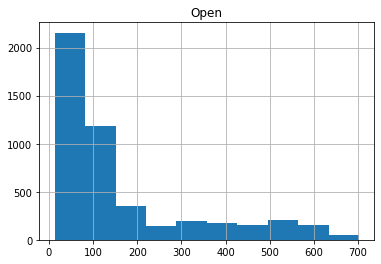

In [246]:
AAPL.hist(column="Open")